In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [2]:
from PIL import Image
import numpy as np
import argparse
import imageio
import dnnlib
import dnnlib.tflib as tflib
import os
import pickle
from tqdm import tqdm

/home/liboxian/anaconda3/envs/deepfacelab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/liboxian/anaconda3/envs/deepfacelab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/liboxian/anaconda3/envs/deepfacelab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/liboxian/anaconda3/

In [3]:
tflib.init_tf()
with open('./networks/normal_face.pkl', "rb") as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 1

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


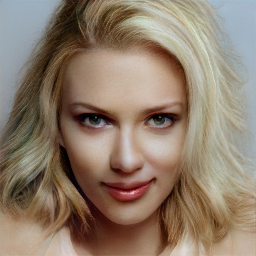

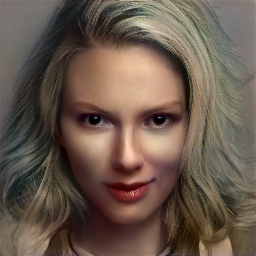

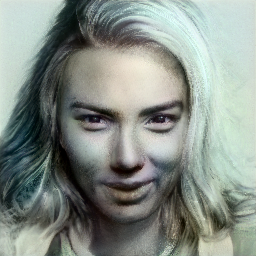

In [50]:
pic1 = np.load('./latent_representations/sjl.npy')
pic2 = np.load('./latent_style/tianshi.npy')
pic3 = np.load('./latent_style/sumiao4.npy')

img1 = Gs_network.components.synthesis.run(pic1[np.newaxis, :], **Gs_syn_kwargs)
img1 = Image.fromarray(img1[0])
img1.resize((256,256))
pic1[9:] = pic2[9:]
img2 = Gs_network.components.synthesis.run(pic1[np.newaxis, :], **Gs_syn_kwargs)
img2 = Image.fromarray(img2[0])
img2.resize((256,256))
pic1[9:] = pic3[9:]
img2 = Gs_network.components.synthesis.run(pic1[np.newaxis, :], **Gs_syn_kwargs)
img2 = Image.fromarray(img2[0])
img2.resize((256,256))

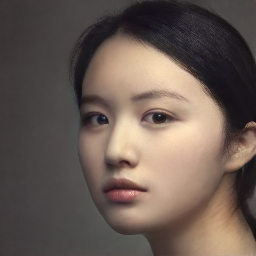

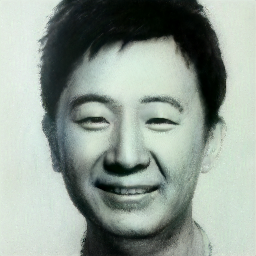

In [51]:
Image.fromarray(Gs_network.components.synthesis.run(pic2[np.newaxis, :], **Gs_syn_kwargs)[0]).resize((256,256))
Image.fromarray(Gs_network.components.synthesis.run(pic3[np.newaxis, :], **Gs_syn_kwargs)[0]).resize((256,256))